# First look at logged data and 'R'

A brief examination of the complete dataset of logged data from the SSEN website.

In [8]:
## Make copy of original database for analysis

file.copy('../dataclean/database/ssen_merged.csv','./data/ssen_merged.csv')

[1] FALSE

In [2]:
# read the data in to a dataframe
data <- read.csv("./data/ssen_merged.csv", header=TRUE, sep=",", dec=".")

In [3]:
# display the first few records
head(data)

elec_timestamp,demand,demand_max,anm_generated,non_anm_generated,total_generation_capacity,ANM_timestamp,operation_core,eqpt_core,site_core,...,site_2B,operation_3,eqpt_3,site_3,operation_4,eqpt_4,site_4,operation_4A,eqpt_4A,site_4A
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2019-01-16 22:42:03,19.66,35.7,17.145,17.075,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:43:03,19.02,35.7,16.829,17.520,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:44:03,18.40,35.7,14.394,17.245,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:45:03,18.25,35.7,13.674,17.446,57.1,2019-01-16 22:42:33,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:46:03,18.70,35.7,14.572,16.457,57.1,2019-01-16 22:46:25,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2019-01-16 22:47:03,18.57,35.7,14.000,16.448,57.1,2019-01-16 22:46:25,ok,ok,ok,...,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [41]:
tail(data)

,elec_timestamp,demand,demand_max,anm_generated,non_anm_generated,total_generation_capacity,ANM_timestamp,operation_core,eqpt_core,site_core,⋯,operation_3,eqpt_3,site_3,operation_4,eqpt_4,site_4,operation_4A,eqpt_4A,site_4A,dt
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dttm>
395050,2019-10-27 21:43:06,14.80,35.7,7.920000,9.247,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:43:06
395051,2019-10-27 21:44:10,14.50,35.7,7.237001,9.060,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:44:10
395052,2019-10-27 21:45:06,14.21,35.7,8.598998,8.649,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:45:06
395053,2019-10-27 21:46:06,14.01,35.7,8.042000,9.379,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:46:06
395054,2019-10-27 21:47:05,14.17,35.7,7.515000,9.543,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:47:05
395055,2019-10-27 21:48:06,14.06,35.7,8.079000,9.354,57.1,2019-10-27 13:35:16,remove,ok,ok,⋯,ok,ok,ok,ok,ok,ok,ok,ok,ok,2019-10-27 21:48:06


In [4]:
# overiew of the data
summary(data)

             elec_timestamp       demand        demand_max    anm_generated   
 2019-01-16 22:42:03:     1   Min.   : 0.71   Min.   :35.70   Min.   : 0.000  
 2019-01-16 22:43:03:     1   1st Qu.:12.46   1st Qu.:35.70   1st Qu.: 1.629  
 2019-01-16 22:44:03:     1   Median :14.85   Median :35.70   Median : 5.089  
 2019-01-16 22:45:03:     1   Mean   :15.23   Mean   :35.70   Mean   : 6.638  
 2019-01-16 22:46:03:     1   3rd Qu.:17.80   3rd Qu.:35.70   3rd Qu.:10.965  
 2019-01-16 22:47:03:     1   Max.   :39.69   Max.   :39.69   Max.   :21.078  
 (Other)            :395049                                                   
 non_anm_generated total_generation_capacity             ANM_timestamp   
 Min.   : 0.000    Min.   :57.10             2019-05-06 07:33:10: 11909  
 1st Qu.: 3.445    1st Qu.:57.10             2019-05-17 10:52:10:  7507  
 Median : 9.002    Median :57.10             2019-10-10 12:46:10:  6700  
 Mean   : 9.841    Mean   :57.11             2019-08-24 10:39:12:  5560 

In [44]:
# aggregate(data.frame(count = data$anm_generated), list(value = data$anm_generated), length)

In [3]:
## convert timestamp strings to datetime data types for plotting
data$dt <- as.POSIXct(data$elec_timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT") ## all dates stored as GMT

In [4]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=8, repr.plot.height=4)

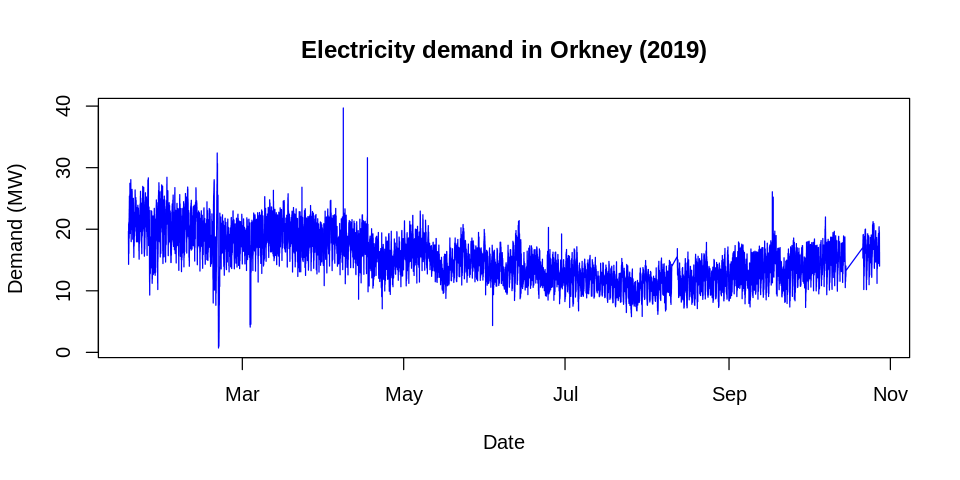

In [19]:
plot(data$dt, data$demand, 
     main= "Electricity demand in Orkney (2019)", 
     xlab = "Date",
     ylab = "Demand (MW)",
     type= "l", col = "blue", pch=46)

This plot shows the complete data set of electricity demand in Orkney over most of the year. It can be seen that electricity usage is significantly lower and with less variation during the summer when compared to the winter months.

There appears to be only two gaps in the data set jsut before September and a larger gap before November.

There are also a few spurious peaks. I 

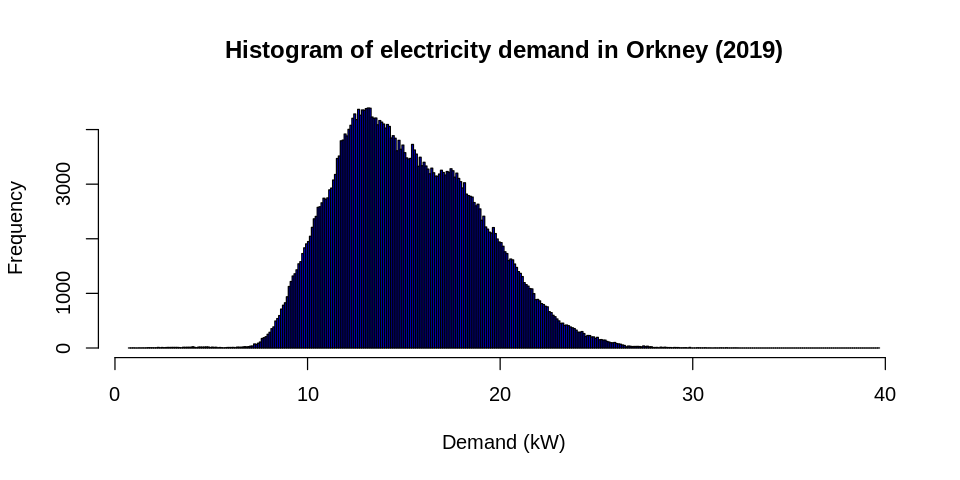

In [10]:
hist(data$demand, 500, main= "Histogram of electricity demand in Orkney (2019)",
     xlab="Demand (kW)",
     col = "blue")

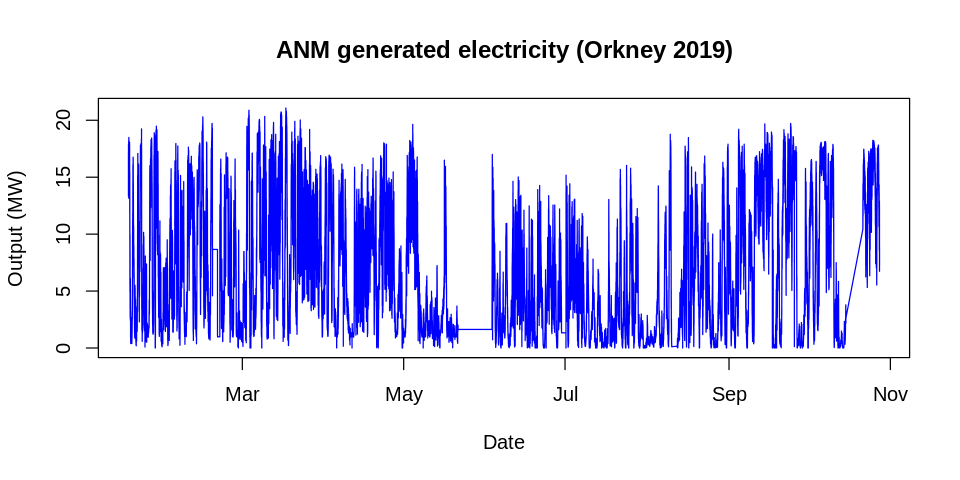

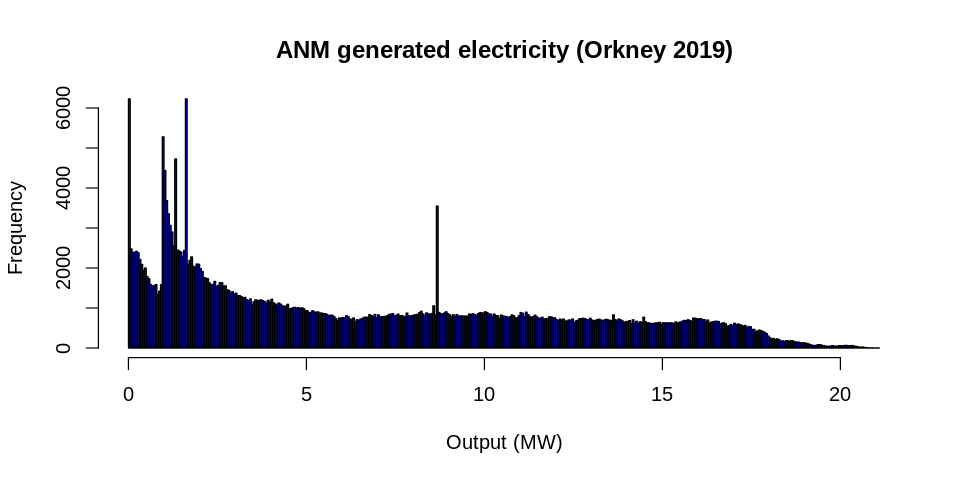

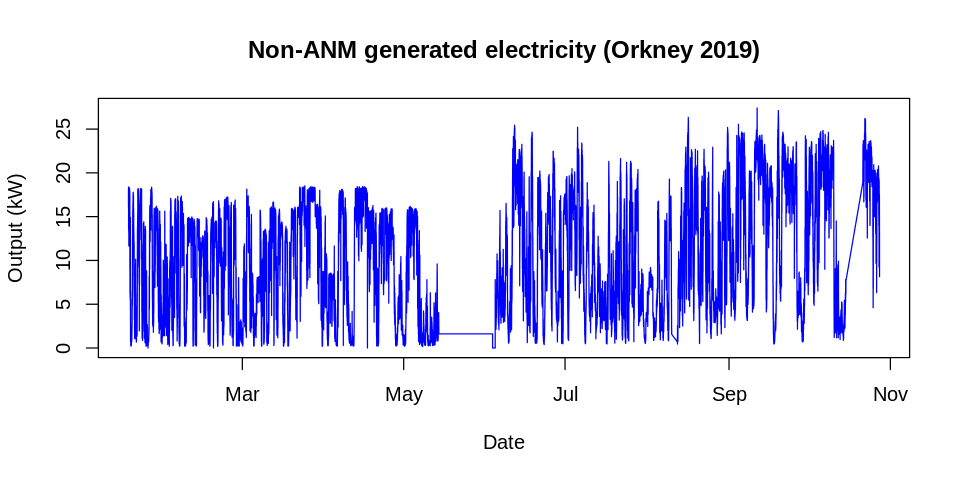

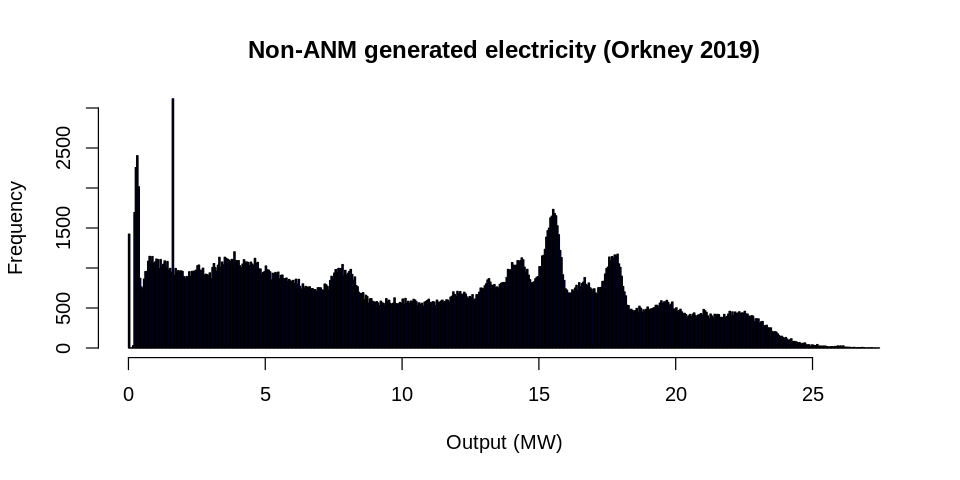

In [18]:
plot(data$dt, data$anm_generated, main= "ANM generated electricity (Orkney 2019)",
     xlab = "Date",
     ylab = "Output (MW)",
     type= "l", col = "blue", pch=46)
hist(data$anm_generated, 500,main= "ANM generated electricity (Orkney 2019)", xlab = "Output (MW)", ylim =c(0,6000), col = "blue")
plot(data$dt, data$non_anm_generated, main= "Non-ANM generated electricity (Orkney 2019)", xlab="Date", ylab = "Output (kW)", type= "l", col = "blue", pch=46)
hist(data$non_anm_generated, 500,main= "Non-ANM generated electricity (Orkney 2019)", xlab = "Output (MW)", ylim =c(0,3000), col = "blue")

In [14]:
##  calculate total generated electricity
data$total_generated <- data$anm_generated+data$non_anm_generated

In [5]:
library(scales)

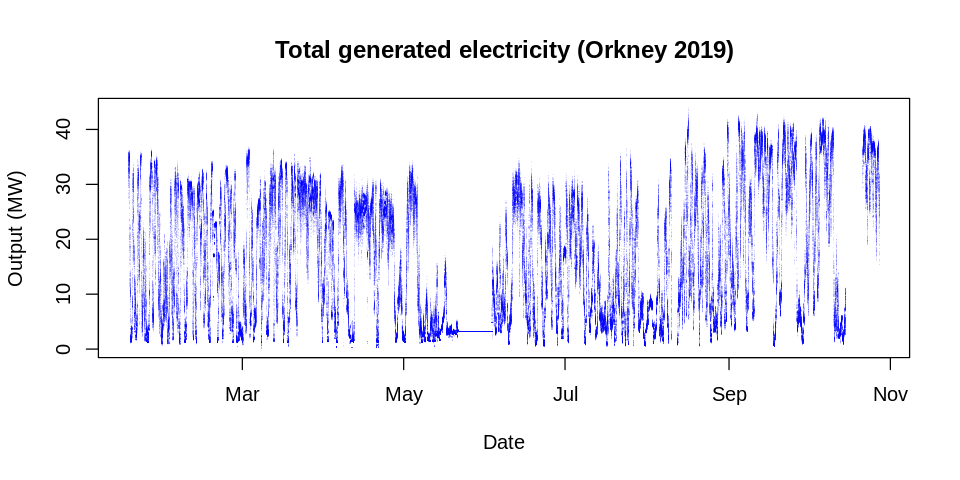

In [17]:
plot(data$dt, data$total_generated, main= "Total generated electricity (Orkney 2019)", xlab="Date", ylab = "Output (MW)", col=alpha(c("blue"), 0.08), pch=46)

## Plot energy demand vs time of day (hours)

The demand for electricity nationally, follows regular patterns thoughout the day, week and annually.  This can be clearly seen on this image:

![](../images/GridWatchDemandCharts.PNG)

(source https://www.gridwatch.templar.co.uk/)

The daily pattern shows demand is low during the night in comparison to the daytime, and peaks in the morning, when people are generally getting up , and in the evening, when people are generally arriving home from work.
The weekly pattern shows lower peak usage over the weekend, and the annual chart shows lower demand over the summer months with peak demand in the winter.  There is noticably reduced demand over the winter festive period at the end of December. More electriciity is used in the darker and colder season for heating and lighting, and industry will be reduced over the holidays.

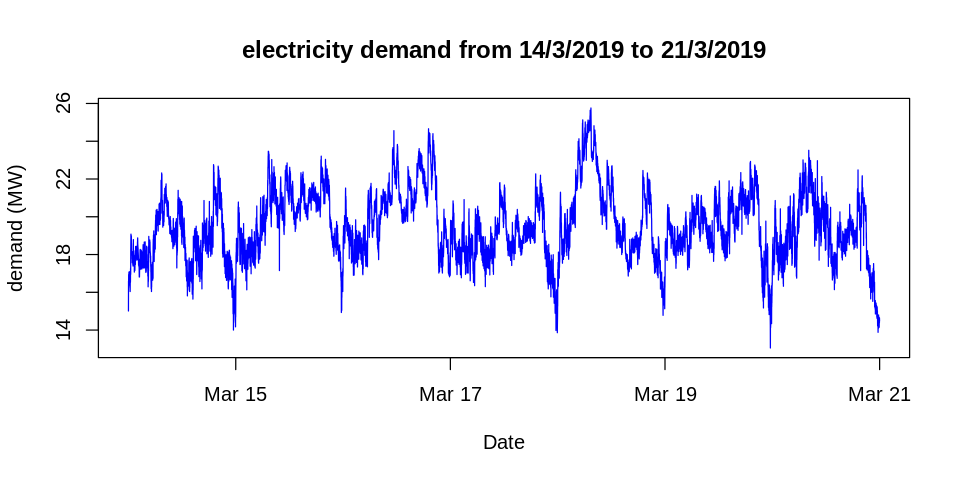

In [34]:
singleweek<-subset(data, 
                   dt>as.POSIXct("2019-03-14 00:00:00",format="%Y-%m-%d %H:%M:%S",tz="GMT") &
                   dt<as.POSIXct("2019-03-21 00:00:00",format="%Y-%m-%d %H:%M:%S",tz="GMT")
                  )

plot(singleweek$dt, singleweek$demand, 
     main= "electricity demand from 14/3/2019 to 21/3/2019",
     ylab = "demand (MW)", xlab="Date",
     type= "l", col = "blue")

posixct datetimes are stored as unix timestamps - i.e. the number of seconds  since midnight 1/1/70.

this value is returned using 'as.numeric()'.  with `number of seconds in a day = 60*60*24 = 86400`, calculating the modulo (the remainder after a whole division) of the datetime with 86400 in effect removes the days, with the minutes remaining.  dividing by 3600 converts this to hour of day. 

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

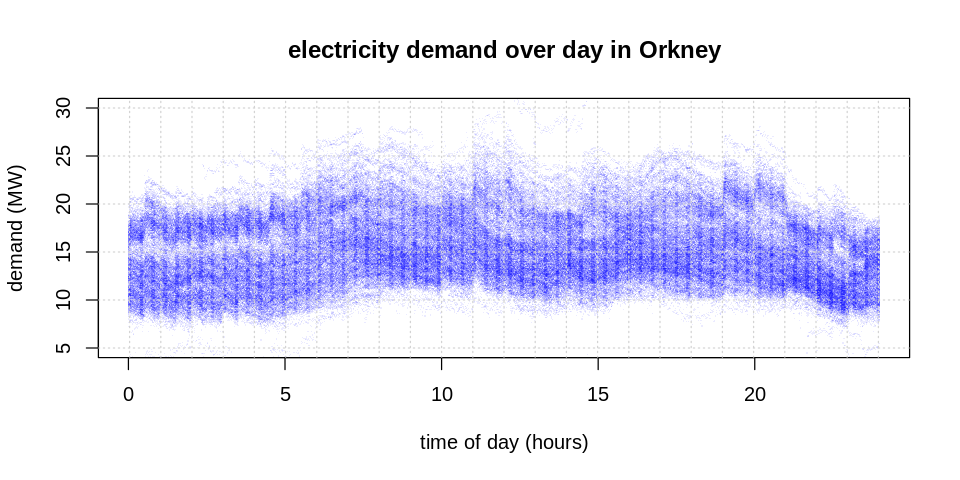

In [25]:
plot((as.numeric(data$dt) %% 86400)/3600, data$demand, 
     main= "electricity demand over day in Orkney", 
     ylab = "demand (MW)", xlab="time of day (hours)",
     ylim= c(5, 30),
     col=alpha(c("blue"), 0.08), pch=46)
grid(nx=26, ny=NULL, col = "lightgray", lty = "dotted")


In [29]:
60*60*24*7 #number of seconds in a week 
as.POSIXct("2019-02-08 00:00:00",format="%Y-%m-%d %H:%M:%S",tz="GMT")
print("2019-02-08 00:00:00 is a Friday")
(as.numeric(as.POSIXct("2019-02-08 00:00:00",format="%Y-%m-%d %H:%M:%S",tz="GMT")) %% 604800)/86400
print("so '0' is a Thursday")

[1] 604800

[1] "2019-02-08 GMT"

[1] "2019-02-08 00:00:00 is a Friday"


[1] 1

[1] "so '0' is a Thursday"


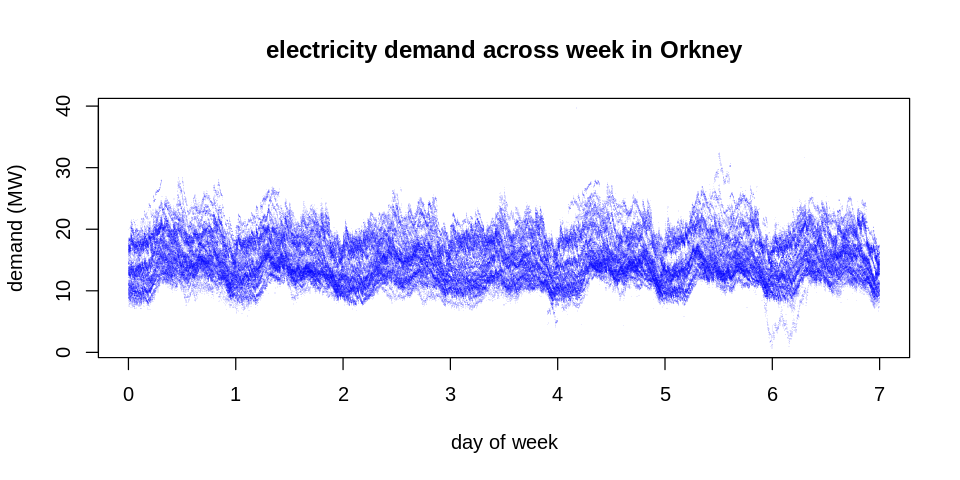

In [20]:
plot((as.numeric(data$dt) %% 604800)/86400, data$demand, main= "electricity demand across week in Orkney", ylab = "demand (MW)", xlab="day of week", col=alpha(c("blue"), 0.08), pch=46)

In [43]:
data$dt[c(1,100000,200000,300000,400000)]

[1] "2019-01-16 22:42:03 GMT" "2019-03-27 18:20:06 GMT"
[3] "2019-06-05 12:53:05 GMT" "2019-08-16 10:36:05 GMT"
[5] NA                       

In [32]:
options(repr.plot.width=8, repr.plot.height=4)

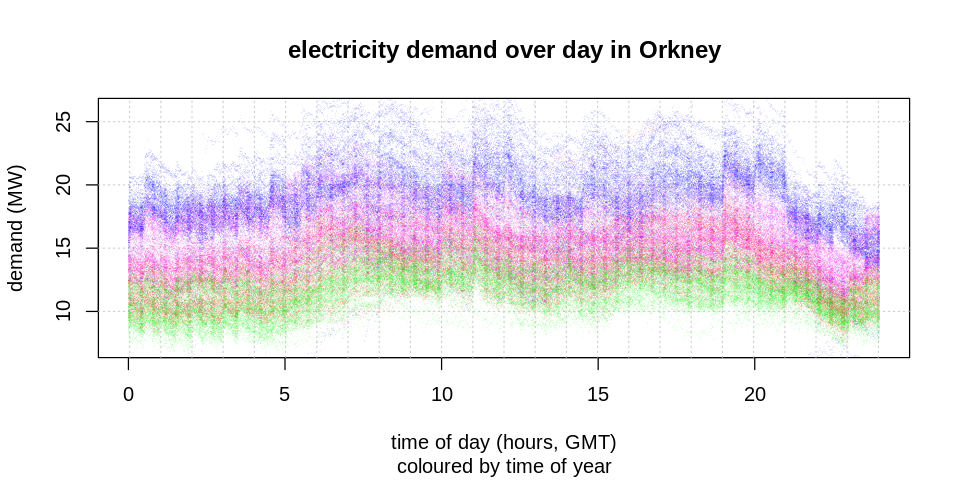

In [33]:
plot((as.numeric(data$dt[300000:400000]) %% 86400)/3600, data$demand[300000:400000], 
     main= "electricity demand over day in Orkney", 
     sub= "coloured by time of year",ylab = "demand (MW)", 
     xlab="time of day (hours, GMT)", 
     col=alpha(c("red"), 0.08), pch=46)
grid(nx=26, ny=NULL, col = "lightgray", lty = "dotted")
points((as.numeric(data$dt[200000:300000]) %% 86400)/3600, data$demand[200000:300000], col=alpha(c("green"), 0.08), pch=46)
points((as.numeric(data$dt[100000:200000]) %% 86400)/3600, data$demand[100000:200000], col=alpha(c("magenta"), 0.08), pch=46)
points((as.numeric(data$dt[0:100000]) %% 86400)/3600, data$demand[0:100000], col=alpha(c("blue"), 0.08), pch=46)


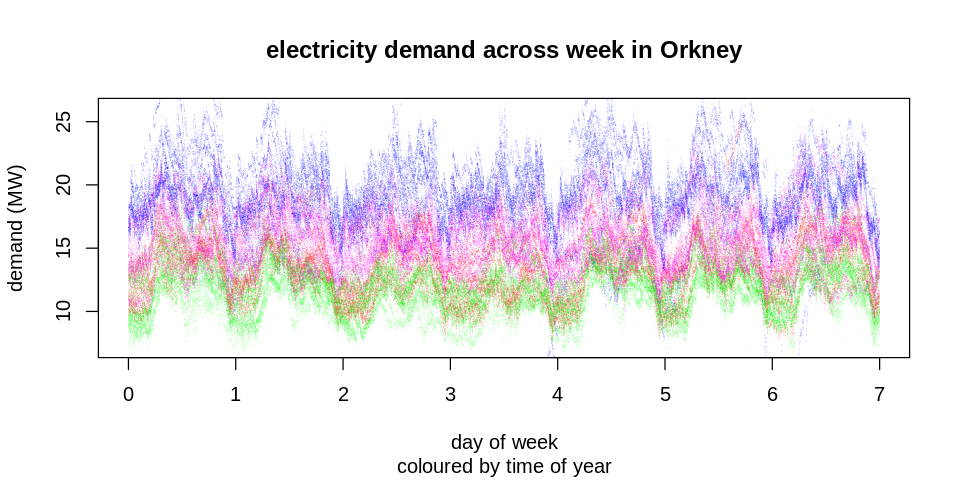

In [21]:
plot((as.numeric(data$dt[300000:400000]) %% 604800)/86400, data$demand[300000:400000],
     main= "electricity demand across week in Orkney", sub= "coloured by time of year",
     ylab = "demand (MW)", xlab="day of week",
     col=alpha(c("red"), 0.08), pch=46)
points((as.numeric(data$dt[200000:300000]) %% 604800)/86400, data$demand[200000:300000],
       col=alpha(c("green"), 0.08), pch=46)
points((as.numeric(data$dt[100000:200000]) %% 604800)/86400, data$demand[100000:200000],
       col=alpha(c("magenta"), 0.08), pch=46)
points((as.numeric(data$dt[0:100000]) %% 604800)/86400, data$demand[0:100000],
       col=alpha(c("blue"), 0.08), pch=46)